In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image  import load_img,ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
train = pd.read_csv('../input/train.csv')
test= pd.read_csv('../input/test.csv')

In [4]:
train.head()
X_train= train.drop(['label'],axis=1)

In [5]:
y_train= train['label']

In [6]:
del train

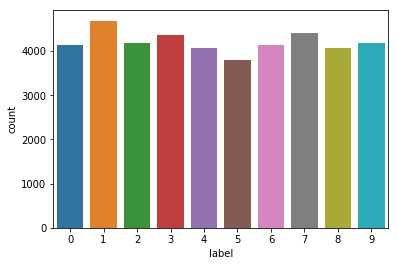

In [7]:
sns.countplot(y_train)

In [8]:
X_train.isnull().any().describe(), test.isnull().any().describe()

(count       784
 unique        1
 top       False
 freq        784
 dtype: object, count       784
 unique        1
 top       False
 freq        784
 dtype: object)

In [9]:
X_train=X_train.astype('float32')/255
test=test.astype('float32')/255


In [10]:
num_classes=len(np.unique(y_train))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


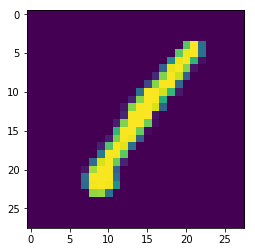

In [11]:
img=X_train.iloc[0].as_matrix()
plt.imshow(img.reshape((28,28)))

In [12]:
y_train=keras.utils.to_categorical(y_train,num_classes)

In [13]:
X_train=X_train.values.reshape(-1,28,28,1)
test= test.values.reshape(-1,28,28,1)

In [14]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.15)

In [15]:
print(X_train.shape)

(35700, 28, 28, 1)


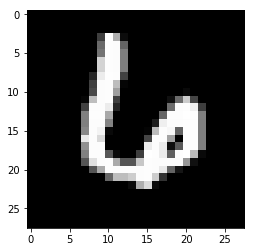

In [16]:
plt.imshow(X_train[1][:,:,0],cmap='gray')

In [17]:
model= Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding= 'same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=4,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=4,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          32832     
__________

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
epochs=10
batch_size=128

In [20]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,rotation_range=0.5,zoom_range=0.1)
datagen.fit(X_train)

In [21]:
checkpoint =model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),epochs=epochs,validation_data= (X_valid,y_valid),verbose=2,steps_per_epoch=X_train.shape[0]/batch_size)    

Epoch 1/10
 - 23s - loss: 1.2411 - acc: 0.5479 - val_loss: 0.4076 - val_acc: 0.8635
Epoch 2/10
 - 23s - loss: 0.5177 - acc: 0.8266 - val_loss: 0.2281 - val_acc: 0.9232
Epoch 3/10
 - 23s - loss: 0.3663 - acc: 0.8805 - val_loss: 0.1641 - val_acc: 0.9459
Epoch 4/10
 - 23s - loss: 0.2871 - acc: 0.9086 - val_loss: 0.1204 - val_acc: 0.9648
Epoch 5/10
 - 23s - loss: 0.2464 - acc: 0.9233 - val_loss: 0.1012 - val_acc: 0.9679
Epoch 6/10
 - 23s - loss: 0.2154 - acc: 0.9310 - val_loss: 0.0827 - val_acc: 0.9741
Epoch 7/10
 - 23s - loss: 0.1973 - acc: 0.9393 - val_loss: 0.0793 - val_acc: 0.9749
Epoch 8/10
 - 23s - loss: 0.1791 - acc: 0.9447 - val_loss: 0.0769 - val_acc: 0.9743
Epoch 9/10
 - 23s - loss: 0.1681 - acc: 0.9463 - val_loss: 0.0659 - val_acc: 0.9790
Epoch 10/10
 - 23s - loss: 0.1600 - acc: 0.9506 - val_loss: 0.0644 - val_acc: 0.9786


In [22]:
score=model.evaluate(X_valid,y_valid,verbose=1)
print('\n', 'Test accuracy:', round(score[1]*100,2))

6300/6300 [==============================] - 1s 211us/step

 Test accuracy: 97.86


In [23]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [24]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("mysubmission.csv",index=False)